# GPU Price–Performance Analysis

This notebook replicates the figures used in the Medium post. It:
- Loads `GPU_benchmarks_v7.csv`
- Filters to Desktop GPUs
- Computes performance-per-dollar and performance-per-watt
- Produces two figures and a top-15 CSV


In [11]:

import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = r"GPU_benchmarks_v7.csv"
FIG1_PATH = r"results/fig_price_vs_perf.png"
FIG2_PATH = r"results/fig_perf_per_dollar_box.png"
TOP_CSV_PATH = r"results/top15_perf_per_dollar.csv"
print("Using:", "GPU_benchmarks_v7.csv")


Using: GPU_benchmarks_v7.csv


## Load data

In [12]:

df = pd.read_csv("GPU_benchmarks_v7.csv")
df.head()


,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category,brand
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown,NVIDIA
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop,NVIDIA
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop,NVIDIA
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop,AMD
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop,NVIDIA


## Clean & derive metrics

In [13]:

expected_cols = ['gpuName','brand','category','G3Dmark','G2Dmark','price','TDP','powerPerformance','testDate']
present_cols = [c for c in expected_cols if c in df.columns]
df = df[present_cols]

# Desktop only
if 'category' in df.columns:
    df = df[df['category'].str.lower() == 'desktop']

# Drop rows missing essentials
df = df.dropna(subset=['price','G3Dmark'])

# Derived metrics
df['PerfPerDollar'] = df['G3Dmark'] / df['price']
if 'TDP' in df.columns:
    df['PerfPerWatt'] = df['G3Dmark'] / df['TDP']
else:
    df['PerfPerWatt'] = pd.NA

# Keep main brands
if 'brand' in df.columns:
    df = df[df['brand'].isin(['AMD','Intel','NVIDIA'])]

df.describe(include='all')


,gpuName,brand,category,G3Dmark,G2Dmark,price,TDP,powerPerformance,testDate,PerfPerDollar,PerfPerWatt
count,242,242,242,242.000000,242.000000,242.000000,214.000000,214.000000,242.000000,242.000000,214.000000
unique,242,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GeForce RTX 3080 Ti,NVIDIA,Desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,131,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4752.685950,432.966942,293.942066,139.049533,32.663598,2013.396694,14.115858,32.664076
std,NaN,NaN,NaN,6271.466387,296.726985,321.168658,94.029991,29.878298,3.256603,12.435596,29.878467
min,NaN,NaN,NaN,3.000000,29.000000,22.990000,4.400000,1.930000,2009.000000,0.015464,1.931818
25%,NaN,NaN,NaN,357.500000,171.250000,95.165000,58.250000,10.017500,2011.000000,3.466774,10.014292
50%,NaN,NaN,NaN,1966.000000,403.000000,176.625000,122.500000,18.725000,2012.000000,10.772549,18.722514
75%,NaN,NaN,NaN,6304.250000,674.000000,343.757500,200.000000,54.732500,2015.750000,22.704414,54.730000


## Figure 1 — Price vs Performance

Saved: results/fig_price_vs_perf.png


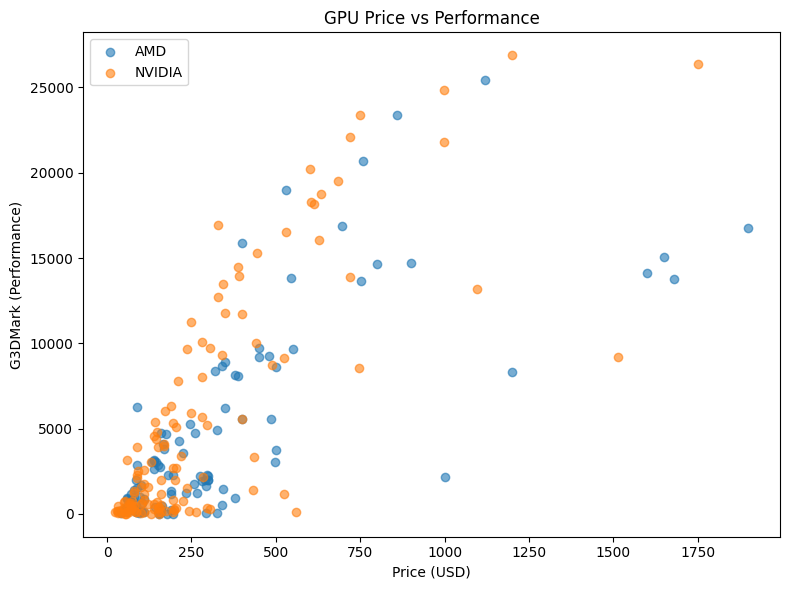

In [14]:

plt.figure(figsize=(8,6))
for brand in sorted(df['brand'].dropna().unique()):
    sub = df[df['brand'] == brand]
    plt.scatter(sub['price'], sub['G3Dmark'], label=brand, alpha=0.6)
plt.xlabel("Price (USD)")
plt.ylabel("G3DMark (Performance)")
plt.title("GPU Price vs Performance")
plt.legend()
plt.tight_layout()
plt.savefig(FIG1_PATH, dpi=160)
print("Saved:", FIG1_PATH)


## Figure 2 — Performance per Dollar by Brand

Saved: results/fig_perf_per_dollar_box.png


C:\Users\hingz\AppData\Local\Temp\ipykernel_17164\3790398055.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=brands_order, showmeans=True)


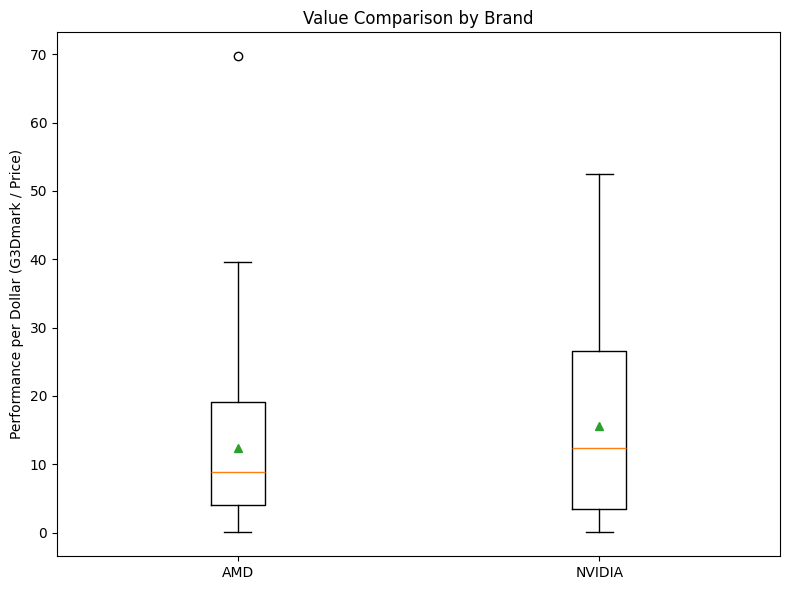

In [15]:

brands_order = [b for b in ['Intel','AMD','NVIDIA'] if b in df['brand'].unique()]
data_box = [df[df['brand']==b]['PerfPerDollar'].dropna() for b in brands_order]
plt.figure(figsize=(8,6))
plt.boxplot(data_box, labels=brands_order, showmeans=True)
plt.ylabel("Performance per Dollar (G3Dmark / Price)")
plt.title("Value Comparison by Brand")
plt.tight_layout()
plt.savefig(FIG2_PATH, dpi=160)
print("Saved:", FIG2_PATH)


## Top 15 GPUs by Performance per Dollar

In [16]:

top15 = df.sort_values('PerfPerDollar', ascending=False).loc[:, ['gpuName','brand','price','G3Dmark','PerfPerDollar']].head(15)
top15.to_csv(TOP_CSV_PATH, index=False)
top15


,gpuName,brand,price,G3Dmark,PerfPerDollar
219,Radeon R9 380,AMD,89.99,6275,69.729970
376,GeForce GTX 470,NVIDIA,59.99,3147,52.458743
32,GeForce RTX 3060,NVIDIA,329.00,16958,51.544073
107,GeForce GTX 980,NVIDIA,247.35,11237,45.429553
317,GeForce GTX 750 Ti,NVIDIA,88.11,3919,44.478493
127,GeForce GTX 970,NVIDIA,237.99,9688,40.707593
47,Radeon RX 6600 XT,AMD,399.99,15853,39.633491
75,GeForce GTX 1070,NVIDIA,342.55,13482,39.357758
83,GeForce GTX 1660 SUPER,NVIDIA,329.99,12732,38.582987
247,GeForce GTX 950,NVIDIA,141.99,5392,37.974505
